<a href="https://colab.research.google.com/github/Orangefox76200/EMD-Capsule-LSTM/blob/main/EMD_Capsule_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMD-Capsule-LSTM with Attention Mechanism**

Install pyEMD (EMD-signal 1.2.3)

In [2]:
!pip install EMD-signal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 115 kB 30.9 MB/s 


In [ ]:
#!pip list

Import Packages

In [3]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from PyEMD import EMD , Visualisation
from PyEMD import EEMD
from PyEMD import CEEMDAN
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import LSTM
from keras.layers import Dense

Stock Index Dataset: DJIA (Jan 04,2010-Dec 31,2019)

Upload **Orangefox76200/EMD-Capsule-LSTM/DJIA.xlsx** (Github) to Google Drive, then import it from Google Drive to EMD_Capsule_LSTM.ipynb

In [9]:
from google.colab import drive
drive.mount ('gdrive')
DJIA_raw = pd.read_excel ('gdrive/MyDrive/Colab Notebooks/DJIA.xlsx')
DJIA_raw

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


,Date,Open,High,Low,Close,Volume
0,"Jan 04, 2010",10430.69,10604.97,10430.69,10583.96,179780000
1,"Jan 05, 2010",10584.56,10584.56,10522.52,10572.02,188540000
2,"Jan 06, 2010",10564.72,10594.99,10546.55,10573.68,186040000
3,"Jan 07, 2010",10571.11,10612.37,10505.21,10606.86,217390000
4,"Jan 08, 2010",10606.40,10619.40,10554.33,10618.19,172710000
...,...,...,...,...,...,...
2511,"Dec 24, 2019",28572.57,28576.80,28503.21,28515.45,86150000
2512,"Dec 26, 2019",28539.46,28624.10,28535.15,28621.39,155970000
2513,"Dec 27, 2019",28675.34,28701.66,28608.98,28645.26,182280000
2514,"Dec 30, 2019",28654.76,28664.69,28428.98,28462.14,181600000


In [10]:
DJIA_raw.shape

(2516, 6)

In [11]:
DJIA_raw.ndim

2

In [12]:
DJIA_raw.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [13]:
DJIA_raw.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,17601.997731,17686.674499,17513.448593,17606.741574,1.895687e+08
std,5148.425951,5162.804510,5131.962418,5147.050108,1.106612e+08
min,9686.480000,9770.870000,9614.320000,9686.480000,8.410000e+06
25%,12977.190000,13044.985000,12921.337500,12981.207500,1.028275e+08
50%,17011.075000,17081.805000,16943.140000,17008.230000,1.516350e+08
75%,21426.617500,21488.690000,21383.437500,21411.107500,2.602025e+08
max,28675.340000,28701.660000,28608.980000,28645.260000,9.005100e+08


In [14]:
DJIA_raw.iloc[:,4]

0       10583.96
1       10572.02
2       10573.68
3       10606.86
4       10618.19
          ...   
2511    28515.45
2512    28621.39
2513    28645.26
2514    28462.14
2515    28538.44
Name: Close, Length: 2516, dtype: float64

Use the close price as the time series to be predicted.

In [16]:
DJIA_timeseries = DJIA_raw.iloc[:,4]
DJIA_timeseries.shape

(2516,)

In [17]:
DJIA_timeseries.ndim

1

In [18]:
DJIA_timeseries.iloc[:]

0       10583.96
1       10572.02
2       10573.68
3       10606.86
4       10618.19
          ...   
2511    28515.45
2512    28621.39
2513    28645.26
2514    28462.14
2515    28538.44
Name: Close, Length: 2516, dtype: float64

Convert Pandas series to Numpy Array

In [19]:
DJIA_timeseries_array = DJIA_timeseries.to_numpy()
DJIA_timeseries_array.shape


(2516,)

In [20]:
DJIA_timeseries_array.dtype

dtype('float64')

Convert object to float64

In [21]:
DJIA_timeseries_array = pd.to_numeric(DJIA_timeseries_array)

In [23]:
DJIA_timeseries_array.dtype

dtype('float64')

## Empirical Mode Decomposition of close price

In [24]:
emd = EMD()

In [25]:
emd.emd(DJIA_timeseries_array)

array([[ 1.78640000e+00,  1.89517291e+00, -2.44098827e+00, ...,
         7.29041178e+01, -7.73223490e+01, -2.66244367e+01],
       [ 5.77899559e+00, -1.29183364e+01, -1.51624708e+01, ...,
         7.73435808e+00, -1.29472919e+01,  1.41700453e+01],
       [ 9.18207935e+00, -2.85318650e+01, -5.66752607e+01, ...,
        -1.17590457e+01, -2.81462492e+01, -2.20480251e+01],
       ...,
       [ 3.15364135e+02,  3.19676443e+02,  3.23933848e+02, ...,
         3.52962566e+02,  3.52065696e+02,  3.50592037e+02],
       [ 1.03442129e+02,  9.88571437e+01,  9.43202199e+01, ...,
         4.79945846e+02,  4.79746293e+02,  4.79368062e+02],
       [ 1.02363608e+04,  1.02394222e+04,  1.02424917e+04, ...,
         2.69894818e+04,  2.69917270e+04,  2.69939419e+04]])

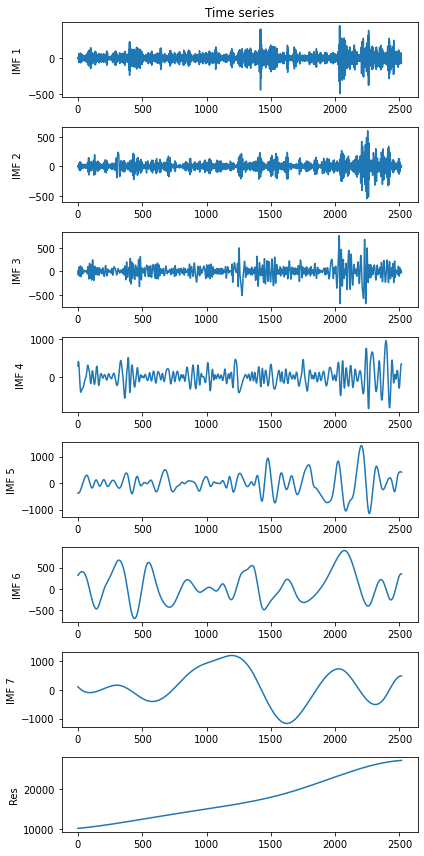

In [26]:
imfs, res = emd.get_imfs_and_residue()
vis = Visualisation()
vis.plot_imfs(imfs=imfs, residue=res, include_residue=True)
#vis.plot_instant_freq(imfs=imfs)
vis.show()

Create imf1, 2, 3, 4, 5, 6, 7 

In [27]:
imf1 = imfs[0,:]
imf2 = imfs[1,:]
imf3 = imfs[2,:]
imf4 = imfs[3,:]
imf5 = imfs[4,:]
imf6 = imfs[5,:]
imf7 = imfs[6,:]

Data splitting: the last 150 samples will be used as the test set. For the rest, the first 80% will be the training set, and the last 20% will be the validation set.

In [55]:
index_length = len(imf1)
imf1_test = imf1[(index_length-150) : index_length] # the start index is included, but the end index is not included.
imf2_test = imf2[(index_length-150) : index_length] # 100 - 10 = 90, the last 10 element index should be from 90 to 99
imf3_test = imf3[(index_length-150) : index_length] # the last 10 elements should be from 91 to 100.
imf4_test = imf4[(index_length-150) : index_length]
imf5_test = imf5[(index_length-150) : index_length]
imf6_test = imf6[(index_length-150) : index_length]
imf7_test = imf7[(index_length-150) : index_length]
res_test = res[(index_length-150) : index_length]

In [63]:
train_start_index = 0
train_end_index = round(0.8 * (index_length - 150))

In [74]:
imf1_train = imf1[0 : train_end_index]
imf2_train = imf2[0 : train_end_index]
imf3_train = imf3[0 : train_end_index]
imf4_train = imf4[0 : train_end_index]
imf5_train = imf5[0 : train_end_index]
imf6_train = imf6[0 : train_end_index]
imf7_train = imf7[0 : train_end_index]
res_train = res[0 : train_end_index]

In [67]:
validation_start_index = train_end_index
validation_end_index = index_length-150


In [73]:
imf1_validation = imf1[validation_start_index:validation_end_index]
imf2_validation = imf2[validation_start_index:validation_end_index]
imf3_validation = imf3[validation_start_index:validation_end_index]
imf4_validation = imf4[validation_start_index:validation_end_index]
imf5_validation = imf5[validation_start_index:validation_end_index]
imf6_validation = imf6[validation_start_index:validation_end_index]
imf7_validation = imf7[validation_start_index:validation_end_index]
res_validation = res[validation_start_index:validation_end_index]

## Normalization (min-max)

Calculate the maximum and the minimum of the training set sequence, then use them to normalize the training set, the validation set, and the test set.

In [93]:
# normalization of imf1_train, imf1_validation, and imf1_test
imf1_train_norm = (imf1_train - min(imf1_train))/(max(imf1_train) - min(imf1_train))
imf1_validation_norm = (imf1_validation - min(imf1_train))/(max(imf1_train) - min(imf1_train))
imf1_test_norm = (imf1_test - min(imf1_train))/(max(imf1_train) - min(imf1_train))

In [95]:
# normalization of imf2_train, imf2_validation, and imf2_test
imf2_train_norm = (imf2_train - min(imf2_train))/(max(imf2_train) - min(imf2_train))
imf2_validation_norm = (imf2_validation - min(imf2_train))/(max(imf2_train) - min(imf2_train))
imf2_test_norm = (imf2_test - min(imf2_train))/(max(imf2_train) - min(imf2_train))

In [96]:
# normalization of imf3_train, imf3_validation, and imf3_test
imf3_train_norm = (imf3_train - min(imf3_train))/(max(imf3_train) - min(imf3_train))
imf3_validation_norm = (imf3_validation - min(imf3_train))/(max(imf3_train) - min(imf3_train))
imf3_test_norm = (imf3_test - min(imf3_train))/(max(imf3_train) - min(imf3_train))

In [97]:
# normalization of imf4_train, imf4_validation, and imf4_test
imf4_train_norm = (imf4_train - min(imf4_train))/(max(imf4_train) - min(imf4_train))
imf4_validation_norm = (imf4_validation - min(imf4_train))/(max(imf4_train) - min(imf4_train))
imf4_test_norm = (imf4_test - min(imf4_train))/(max(imf4_train) - min(imf4_train))

In [98]:
# normalization of imf5_train, imf5_validation, and imf5_test
imf5_train_norm = (imf5_train - min(imf5_train))/(max(imf5_train) - min(imf5_train))
imf5_validation_norm = (imf5_validation - min(imf5_train))/(max(imf5_train) - min(imf5_train))
imf5_test_norm = (imf5_test - min(imf5_train))/(max(imf5_train) - min(imf5_train))

In [99]:
# normalization of imf6_train, imf6_validation, and imf6_test
imf6_train_norm = (imf6_train - min(imf6_train))/(max(imf6_train) - min(imf6_train))
imf6_validation_norm = (imf6_validation - min(imf6_train))/(max(imf6_train) - min(imf6_train))
imf6_test_norm = (imf6_test - min(imf6_train))/(max(imf6_train) - min(imf6_train))

In [100]:
# normalization of imf7_train, imf7_validation, and imf7_test
imf7_train_norm = (imf7_train - min(imf7_train))/(max(imf7_train) - min(imf7_train))
imf7_validation_norm = (imf7_validation - min(imf7_train))/(max(imf7_train) - min(imf7_train))
imf7_test_norm = (imf7_test - min(imf7_train))/(max(imf7_train) - min(imf7_train))

In [101]:
# normalization of res_train, res_validation, and res_test
res_train_norm = (res_train - min(res_train))/(max(res_train) - min(res_train))
res_validation_norm = (res_validation - min(res_train))/(max(res_train) - min(res_train))
res_test_norm = (res_test - min(res_train))/(max(res_train) - min(res_train))

## Build the input sequences. Each sequence contains 250 elements. 